#D'Maris Buffet Restaurant Simulation

# 1. Team work declaration
## Team member

| Student            | Id      |
|------------------- |---------|
| Nguyễn Phú Quý     | 2212871 |
| Phan Lê Hậu        | 2210969 |
| Nguyễn Thanh Thuyên| 2233080 |
| Nguyễn Hoàng Sơn   | 2212943 |
| Nguyễn Hà Sơn      | 2212942 |
| Võ Thị Ánh Tuyết   | 2213826 |
| Danh Nhựt Quang    | 2212725 |


## Workmap declaration

| Last name | Student ID | Design Role | Dev Role | Eval Role | Report Role | Ass1 work description (details in text)  | Rating | week 2 outcome | week 3 outcome | week 4 outcome  |
|-----------|------------|-------------|----------|-----------|-------------|------------------------------------------|--------|----------------|----------------|-----------------|
|Quý    |2212871| yes | yes | no  | yes | Design Suggestion, System Implement Code, Evaluate Review, Collecting Materials |A| System Design | System Implement code | Writing Report |
|Hậu    |2210969| yes | no  | no  | yes |Design Suggestion, Evaluate Review|B|System design||Evaluate|
|Thuyên |2233080| no  | yes | no  | yes |Describe functions of the application, Draw class diagram|C||System design,Implement code|Writing report|
|Sơn    |2212943| yes | no  | yes | yes |System design, Evaluate|B|System design||Evaluate|
|Sơn    |2212942| no  | no  | yes | yes |System design, Evaluate|B|System design||Evaluate|
|Tuyết  |2213826| no  | no  | yes | yes | System design, Evaluate, Experiments, Conclusions|A||System design|Experiments, Writing report|
|Quang  |2212725| no  | no  | yes | no  |System design, Evaluate|B||System Design|Evalute|


# 2.System design

## System Performance Steps

### 1. Define Goal and System
#### 1.1 Goal
Evaluate and optimize the performance of the buffet system to reduce average waiting times, decrease the rate of lost customers, increase throughput (number of customers completing meals), and ensure system stability under high load. Specifically, identify bottlenecks and propose changes to achieve an average system time below 60 minutes (reasonable buffet dining duration), a loss rate below 1%, and a completion rate above 90%.
#### 1.2 System Definition
The D'Maris buffet system is modeled as a complex Queueing Network with the following main components:
- Customer Arrival Source: The system has two independent customer sources (Arrival Stream A and B) with different arrival rates, simulating customer flows in groups and peak times.
- Service Stations: The system includes 6 main service stations:
  - Two payment stations (PC-A, PC-B): Modeled as M/M/1/K with K=10, representing cashier counters with limited queue capacity.
  - Four food stations: Salad Bar, Main Dish, Dessert, and Drink Station - each station has its own number of service staff and processing speed.
- Customer Flow: Customers move between stations according to a predetermined routing probability matrix, simulating the actual dining behavior of diners at the buffet.
- Service Endpoint: Customers leave the system through the "Sink" node after completing their service journey.
### 2. Service and Outcomes

| Service                    | Outcomes                                      | Type                         |
|----------------------------|-----------------------------------------------|------------------------------|
| Payment at Counter A/B     | Successfully Entered / Denied (Queue Full)   | Correct / Lost               |
| Food Service at 4 Counters | Completed / Excessively Delayed / Skipped    | Correct / Delayed / Skipped  |
| Movement Between Counters  | Followed Planned Route                        | Correct                      |
| System Exit (Sink)         | Finished Meal, Departed                       | Complete                     |


Key Performance Outcomes to Measure:
- **Good:** Customer pays, gets food, leaves successfully.
- **Bad:** Customer turned away at payment because queue is full.
- **Problem:** Customer waits too long or gets stuck in the system.
### 3. Select Metrics
| Group       | Metric                              | Type (Utility) | Formula / Meaning                                |
|-------------|--------------------------------------|----------------|--------------------------------------------------|
| Speed       | W_q (Waiting Time in Queue) | LB | $ W_q = \frac{P_0 (\lambda/\mu)^c \rho}{c! (1-\rho)^2} $ (M/M/c))                         |
|             | W (System Time)        | LB | $ W = W_q + \frac{1}{\mu} $                                |
| Productivity| Throughput | HB | $ \lambda (1 - P_{\text{loss}}) $                            |
| Resources   | ρ (Utilization)              | HB |$ \rho = \frac{\lambda}{c\mu} $ |
|             | Average Queue Length (L_q)           | LB | $( L_q = \frac{P_0 (\lambda / \mu)^c \rho}{c! (1 - \rho)^2} $\)                               |
| Reliability | Loss Rate | LB | $ P_K = \frac{(\lambda/\mu)^K}{K!} P_0 $ (M/M/1/K)                            |
| Fairness    | Waiting Time: Main vs Salad Counters | NB | Compare variance between stations                 |

With:
- W_q < 5 min
- Loss rate < 1%
- System time < 15 min

### 4. List System Parameters
System Parameters:
- Arrival Rates:
    - λA = 2.0 customers/minute
    - λB = 1.0 customers/minute
- Service Rates:
  - Payment: μPC-A = 3.0 customers/minute, μPC-B = 3.0 customers/minute
  - Salad: μSalad = 0.5 customers/minute
  - Main: μMain = 0.25 customers/minute
  - Dessert: μDessert = 1.0 customers/minute
  - Drink: μDrink = 2.0 customers/minute
- Number of Servers:
  - Payment: 1 server per counter
  - Salad: 3 servers
  - Main: 5 servers
  - Dessert: 2 servers
  - Drink: 4 servers
- Queue Capacities: 10 customers for payment counters
### 5. List Factors to Study
According to initial simulation results:
  - The average system time of 1401.26 minutes ( > 23 hours) is unrealistic for a restaurant
  - The waiting time at Main station is extremely high at 1849.76 minutes
  - The customer rejection rate at PC-A is 0.48% (86 customers)

Adjustable parameters to improve performance:
  - Number of servers at Main station: increase [5, 10, 20]
  - Service rate at Main station: increase [0.25, 0.5, 0.75]
  - Number of servers at Salad station: increase from current level [3, 4, 5]
  - Modify servers at Station A
  - Increase/Decrease customer arrival rate at A (λA): [1.5, 2.0, 2.5]


### 6. Evaluation Technique
The D'Maris buffet restaurant system consists of **9 nodes and 7 different queue type**s, with high complexity that makes applying analytical models infeasible. Specifically, the system has **two independent Poisson customer sources** (λ_A = 2.0 at the main entrance and λ_B = 1.0 at the secondary entrance), capacity limits of K=10 at two payment counters (Nodes 3 & 4 - M/M/1/10), and **four M/M/c food stations** with different numbers of servers (Salad: c=3, μ=0.5; Main: c=?, μ=0.25; Dessert: c=2, μ=1.0; Drink: c=4, μ=2.0).

Particularly, **strong feedback loops** are demonstrated through routing probabilities: from Drink back to Main (40%), from Main back to itself (10%), and from Salad back to Main (80%), leading to an unstable arrival rate at the Main station (λ_Main) that depends on customer behavior. Additionally, dynamic routing with 5 probability branches dependent on the current node makes it impossible to solve the Markov Chain using general formulas for individual M/M/c or M/M/1/K queues. Simple Markov assumptions would lead to serious inaccuracies due to the existence of feedback loops and complex routing.

Therefore, **Discrete-Event Simulation (DES)** was selected as the appropriate technique because it simulates discrete events (arrivals, waiting, service, departures, routing) in real-time, allowing tracking of individual customer journeys without requiring closed-form formulas. DES effectively handles feedback loops through customer journey loops, probabilistic routing through random selection based on probability tables, capacity limits K=10 through automatic rejection mechanisms, and accurately measures metrics (W_q, L_q, Loss Rate) through data logs from each replication.
### 7. Select Workload
**Workload:** Poisson arrivals, representing random customer arrivals at the buffet. At least 3 kinds:
| Workload     | Description                          | λ_A (customers/min) | λ_B (customers/min) | λ Total | Evaluation Purpose                                                       |
|--------------|---------------------------------------|----------------------|----------------------|---------|--------------------------------------------------------------------------|
| Normal (Daily Operation) | Regular hours (10:00–14:00, 17:00–20:00) | 2.0                  | 1.0                  | 3.0     | Baseline – verify stable performance and validate the model              |
| Peak (Rush Hour)         | Peak hours (12:00–13:00, 19:00–20:00)     | 3.0                  | 1.5                  | 4.5     | Stress test – detect bottlenecks and measure system load capacity        |
| Off-peak (Low Traffic)   | Low-traffic hours (08:00–10:00, 21:00–22:00) | 1.0               | 0.5                  | 1.5     | Evaluate resource efficiency, low utilization, avoid over-provisioning   |

To ensure the simulation results reflect the steady-state of the system and eliminate the influence of the startup phase, a warm-up period of 2000 minutes was applied. Data collected during this period will be excluded from the final results analysis.
Rationale:
- The warm-up period allows the system to reach a stable state before data collection.
- It eliminates bias from the initial customers who experience low system occupancy times.
- It ensures that metrics reflect system behavior under realistic operating conditions.
- `WARMUP = 2000`
Increased simulation time to 10,000 minutes, sufficiently long to reach steady-state (eliminating the transient phase of approximately the first 1,000 minutes). Number of replications: 10 runs per configuration, reducing the confidence interval (CI) to <5%

## System Component/Module description

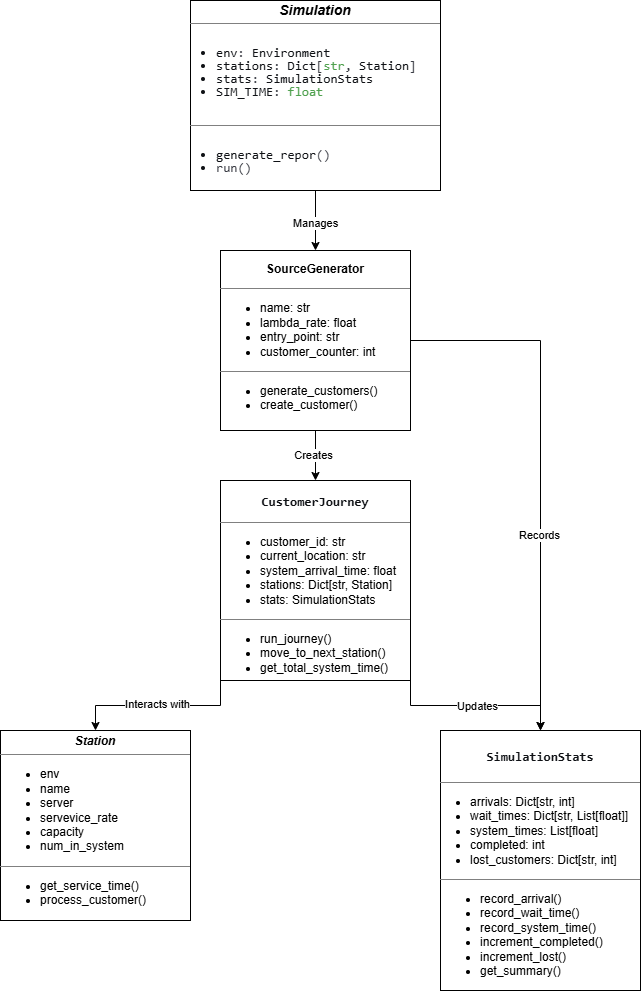

### 1. Class Station

In [ ]:
class Station:
    def __init__(self, env, name, num_servers, service_rate, capacity=float('inf')):
        self.env = env
        self.name = name

        self.server = simpy.Resource(env, capacity=num_servers)
        self.service_rate = service_rate
        self.capacity = capacity

        self.num_in_system = 0

    def get_service_time(self):
        return np.random.exponential(1.0 / self.service_rate)

This class models a service station in a queueing system, such as a checkout counter or a food counter.

**Initialized Attributes:**

*self.env:* Stores the simulation environment for later use.

*self.name:* Stores the name of the station.

*self.server:* A Simpy Resource (simpy.Resource) representing the servers. This is the core component for managing server acquisition and release, as well as the customer queue. The number of servers is determined by num_servers.

*self.service_rate:* Stores the service rate.

*self.capacity:* Stores the queue capacity.

*self.num_in_system*: A counter to track the total number of customers currently in this station's system (including those being served and those waiting in the queue). Initialized to 0.

**Method: get_service_time**

This method simulates the service time for a customer at the station.

### 2. Module customer_journey

In [ ]:
def customer_journey(env, name, current_location, stations, stats):
    system_arrival_time = env.now
    while current_location != 'Sink':

        station = stations[current_location]
        node_arrival_time = env.now

        if station.capacity < float('inf'):
            if station.num_in_system >= station.capacity:
                stats['lost'][station.name] += 1
                return
            station.num_in_system += 1

        with station.server.request() as req:
            yield req

            wait = env.now - node_arrival_time
            stats['wait_times'][station.name].append(wait)

            service_time = station.get_service_time()
            yield env.timeout(service_time)

        if station.capacity < float('inf'):
            station.num_in_system -= 1

        rules = ROUTING_RULES[current_location]
        destinations = list(rules.keys())
        probabilities = list(rules.values())

        current_location = np.random.choice(destinations, p=probabilities)

    total_system_time = env.now - system_arrival_time
    stats['system_time'].append(total_system_time)
    stats['completed'] += 1

This module defines the journey of a customer through the buffet restaurant system, from the moment they enter until they leave. It simulates the entire process: choosing a station, waiting in line, being served, and moving to the next station based on probabilities.



1.   system_arrival_time = env.now - Records the time of entry into the system.
2.   while current_location != 'sink' - Loop until the customer exits the system.
1.   Check capacity - If the station is full, the customer is rejected.
2.   yield req - Join the queue and wait for a turn.
1.   Calculate waiting time and record statistics.
2.   yield env.timeout(service_time) - Receive service.
1.   Select the next station based on probabilities from ROUTING_RULES.
2.   Record completion upon reaching 'Sink'.


### 3. Module source_generator

In [ ]:
def source_generator(env, name, lambda_rate, entry_point, stations, stats):
    customer_id = 0
    while True:
        iat = np.random.exponential(1.0 / lambda_rate)
        yield env.timeout(iat)

        customer_id += 1
        customer_name = f"{name}-{customer_id}"
        stats['arrivals'][name] += 1

        env.process(customer_journey(env, customer_name, entry_point, stations, stats))

This module acts as the customer source, generating new customers arriving to the system according to an inter-arrival time distribution that follows an exponential distribution. It serves as the ‘entry point’ of the entire simulation system.


1.   customer_id = 0 - Initialize the customer counter.
1.   while True: - An infinite loop that continuously generates customers.

1.  iat = np.random.exponential(1.0 / lambda_rate) - Calculate the inter-arrival time between two customers.
2.  yield env.timeout(iat) - Wait before creating the next customer.
2.   customer_id += 1 - Increment the customer ID.
2.   stats['arrivals'][name] += 1 - Record arrival statistics.
1.   env.process(customer_journey(...)) - Start the journey for a new customer.






### 4. Module run_simulation

In [ ]:
def run_simulation():
    print(f"Bắt đầu mô phỏng Buffet D'Maris (thời gian: {SIM_TIME} phút)")
    env = simpy.Environment()

    stats = {
        'arrivals': collections.defaultdict(int),
        'lost': collections.defaultdict(int),
        'completed': 0,
        'wait_times': collections.defaultdict(list),
        'system_time': []
    }

    # Tạo trạm
    stations = {
        'PC-A': Station(env, 'PC-A', SERVERS_PCA, MU_PCA, K_PCA),
        'PC-B': Station(env, 'PC-B', SERVERS_PCB, MU_PCB, K_PCB),
        'Salad': Station(env, 'Salad', SERVERS_SALAD, MU_SALAD),
        'Main': Station(env, 'Main', SERVERS_MAIN, MU_MAIN),
        'Dessert': Station(env, 'Dessert', SERVERS_DESSERT, MU_DESSERT),
        'Drink': Station(env, 'Drink', SERVERS_DRINK, MU_DRINK)
    }

    env.process(source_generator(env, 'Entrance-A', LAMBDA_A, 'PC-A', stations, stats))
    env.process(source_generator(env, 'Entrance-B', LAMBDA_B, 'PC-B', stations, stats))

    env.run(until=SIM_TIME)

    print("\n--- Kết quả Mô phỏng ---")
    print(f"Tổng số khách hàng đến (A): {stats['arrivals']['Entrance-A']}")
    print(f"Tổng số khách hàng đến (B): {stats['arrivals']['Entrance-B']}")
    total_arrivals = sum(stats['arrivals'].values())
    print(f"TỔNG SỐ KHÁCH HÀNG: {total_arrivals}")

    print("\n--- Khách hàng bị từ chối ---")
    lost_a = stats['lost']['PC-A']
    lost_b = stats['lost']['PC-B']
    print(f"Bị từ chối tại PC-A: {lost_a} ({(lost_a / total_arrivals) * 100:.2f}%)")
    print(f"Bị từ chối tại PC-B: {lost_b} ({(lost_b / total_arrivals) * 100:.2f}%)")

    print(f"\nTổng số khách hoàn thành (đến Sink): {stats['completed']}")

    print("\n--- Thống kê thời gian (phút) ---")
    if stats['system_time']:
        avg_sys_time = np.mean(stats['system_time'])
        print(f"Thời gian trung bình hệ thống: {avg_sys_time:.2f} phút")
    else:
        print("Không có khách hàng nào hoàn thành.")

    print("\nThời gian chờ trung bình tại mỗi trạm:")
    for station_name, times in stats['wait_times'].items():
        if times:
            avg_wait = np.mean(times)
            print(f"  - {station_name}: {avg_wait:.2f} phút")
        else:
            print(f"  - {station_name}: 0.00 phút (không có dữ liệu)")

This module is the central controller of the entire simulation system. It initializes all components, runs the simulation for a specified duration, and aggregates the final results.



1.   env = simpy.Environment() - Initialize the simulation environment.
1.   Initialize the stats dictionary - Set up the system for collecting statistics.
1.   Create the stations: PC-A, PC-B, Salad, Main, Dessert, Drink.
1.   Start 2 source generators:
  *  source_generator('Entrance-A', LAMBDA_A, 'PC-A')
  *  source_generator('Entrance-B', LAMBDA_B, 'PC-B')
5.   env.run(until=SIM_TIME) - Run the simulation for a specified duration.

2.   Print the results report:

    Arrival statistics

    Rejected customers

    Completed customers

    Average system time

    Waiting time at each station


# 3. System Implementation



Install prerequisite library


*   simpy
*   numpy


In [ ]:
!pip install simpy
!pip install numpy

## Queuing Node 1



In [ ]:
LAMBDA_A = 2.0
MU_PCA = 3.0
SERVERS_PCA = 1
K_PCA = 10


## Queuing node 2


In [ ]:
LAMBDA_B = 1.0
MU_PCB = 3.0
SERVERS_PCB = 1
K_PCB = 10

## Queuing node 3


In [ ]:
MU_SALAD = 0.5
SERVERS_SALAD = 3

## Queuing node 4


In [ ]:
MU_MAIN = 0.25
SERVERS_MAIN = 5

## Queuing node 5


In [ ]:
MU_DESSERT = 1.0
SERVERS_DESSERT = 2

## Queuing node 6


In [ ]:
MU_DRINK = 2.0
SERVERS_DRINK = 4

## System configuration and execution

In [ ]:
import simpy
import numpy as np
import collections

SIM_TIME = 6000 #(phút)

# Tốc độ đến (khách/phút)
LAMBDA_A = 2.0  # Nguồn A
LAMBDA_B = 1.0  # Nguồn B

# Trạm Thanh toán (M/M/1/10)
MU_PCA = 3.0     # Tốc độ phục vụ PC-A
SERVERS_PCA = 1  # Số máy chủ PC-A
K_PCA = 10       # Sức chứa hệ thống PC-A

MU_PCB = 3.0     # Tốc độ phục vụ PC-B
SERVERS_PCB = 1  # Số máy chủ PC-B
K_PCB = 10       # Sức chứa hệ thống PC-B

# Trạm Thức ăn (M/M/c)
MU_SALAD = 0.5     # Tốc độ phục vụ Salad
SERVERS_SALAD = 3  # Số quầy Salad

MU_MAIN = 0.25     # Tốc độ phục vụ Món chính
SERVERS_MAIN = 5   # Số quầy Món chính

MU_DESSERT = 1.0     # Tốc độ phục vụ Tráng miệng
SERVERS_DESSERT = 2  # Số quầy Tráng miệng

MU_DRINK = 2.0     # Tốc độ phục vụ Đồ uống
SERVERS_DRINK = 4  # Số quầy Đồ uống

#Routing
ROUTING_FROM_PAYMENT = {
    'Salad': 0.40,
    'Main': 0.50,
    'Drink': 0.10
}

ROUTING_FROM_SALAD = {
    'Main': 0.80,
    'Drink': 0.10,
    'Sink': 0.10
}

ROUTING_FROM_MAIN = {
    'Dessert': 0.60,
    'Main': 0.10,
    'Drink': 0.20,
    'Sink': 0.10
}

ROUTING_FROM_DESSERT = {
    'Drink': 0.40,
    'Sink': 0.50,
    'Main': 0.10
}

ROUTING_FROM_DRINK = {
    'Main': 0.40,
    'Dessert': 0.30,
    'Sink': 0.20,
    'Salad': 0.10
}

ROUTING_RULES = {
    'PC-A': ROUTING_FROM_PAYMENT,
    'PC-B': ROUTING_FROM_PAYMENT,
    'Salad': ROUTING_FROM_SALAD,
    'Main': ROUTING_FROM_MAIN,
    'Dessert': ROUTING_FROM_DESSERT,
    'Drink': ROUTING_FROM_DRINK
}

#Class cho các trạm
class Station:
    def __init__(self, env, name, num_servers, service_rate, capacity=float('inf')):
        self.env = env
        self.name = name

        self.server = simpy.Resource(env, capacity=num_servers)
        self.service_rate = service_rate
        self.capacity = capacity

        self.num_in_system = 0

    def get_service_time(self):
        return np.random.exponential(1.0 / self.service_rate)

def customer_journey(env, name, current_location, stations, stats):
    system_arrival_time = env.now
    while current_location != 'Sink':

        station = stations[current_location]
        node_arrival_time = env.now

        if station.capacity < float('inf'):
            if station.num_in_system >= station.capacity:
                stats['lost'][station.name] += 1
                return
            station.num_in_system += 1

        with station.server.request() as req:
            yield req

            wait = env.now - node_arrival_time
            stats['wait_times'][station.name].append(wait)

            service_time = station.get_service_time()
            yield env.timeout(service_time)

        if station.capacity < float('inf'):
            station.num_in_system -= 1

        rules = ROUTING_RULES[current_location]
        destinations = list(rules.keys())
        probabilities = list(rules.values())

        current_location = np.random.choice(destinations, p=probabilities)

    total_system_time = env.now - system_arrival_time
    stats['system_time'].append(total_system_time)
    stats['completed'] += 1

#Tạo source
def source_generator(env, name, lambda_rate, entry_point, stations, stats):
    customer_id = 0
    while True:
        iat = np.random.exponential(1.0 / lambda_rate)
        yield env.timeout(iat)

        customer_id += 1
        customer_name = f"{name}-{customer_id}"
        stats['arrivals'][name] += 1

        env.process(customer_journey(env, customer_name, entry_point, stations, stats))

#Simulation
def run_simulation():
    print(f"Bắt đầu mô phỏng Buffet D'Maris (thời gian: {SIM_TIME} phút)")
    env = simpy.Environment()

    stats = {
        'arrivals': collections.defaultdict(int),
        'lost': collections.defaultdict(int),
        'completed': 0,
        'wait_times': collections.defaultdict(list),
        'system_time': []
    }

    # Tạo trạm
    stations = {
        'PC-A': Station(env, 'PC-A', SERVERS_PCA, MU_PCA, K_PCA),
        'PC-B': Station(env, 'PC-B', SERVERS_PCB, MU_PCB, K_PCB),
        'Salad': Station(env, 'Salad', SERVERS_SALAD, MU_SALAD),
        'Main': Station(env, 'Main', SERVERS_MAIN, MU_MAIN),
        'Dessert': Station(env, 'Dessert', SERVERS_DESSERT, MU_DESSERT),
        'Drink': Station(env, 'Drink', SERVERS_DRINK, MU_DRINK)
    }

    env.process(source_generator(env, 'Entrance-A', LAMBDA_A, 'PC-A', stations, stats))
    env.process(source_generator(env, 'Entrance-B', LAMBDA_B, 'PC-B', stations, stats))

    env.run(until=SIM_TIME)

    print("\n--- Kết quả Mô phỏng ---")
    print(f"Tổng số khách hàng đến (A): {stats['arrivals']['Entrance-A']}")
    print(f"Tổng số khách hàng đến (B): {stats['arrivals']['Entrance-B']}")
    total_arrivals = sum(stats['arrivals'].values())
    print(f"TỔNG SỐ KHÁCH HÀNG: {total_arrivals}")

    print("\n--- Khách hàng bị từ chối ---")
    lost_a = stats['lost']['PC-A']
    lost_b = stats['lost']['PC-B']
    print(f"Bị từ chối tại PC-A: {lost_a} ({(lost_a / total_arrivals) * 100:.2f}%)")
    print(f"Bị từ chối tại PC-B: {lost_b} ({(lost_b / total_arrivals) * 100:.2f}%)")

    print(f"\nTổng số khách hoàn thành (đến Sink): {stats['completed']}")

    print("\n--- Thống kê thời gian (phút) ---")
    if stats['system_time']:
        avg_sys_time = np.mean(stats['system_time'])
        print(f"Thời gian trung bình hệ thống: {avg_sys_time:.2f} phút")
    else:
        print("Không có khách hàng nào hoàn thành.")

    print("\nThời gian chờ trung bình tại mỗi trạm:")
    for station_name, times in stats['wait_times'].items():
        if times:
            avg_wait = np.mean(times)
            print(f"  - {station_name}: {avg_wait:.2f} phút")
        else:
            print(f"  - {station_name}: 0.00 phút (không có dữ liệu)")


# 4. Present results

In [ ]:
if __name__ == "__main__":
    run_simulation()

Bắt đầu mô phỏng Buffet D'Maris (thời gian: 6000 phút)

--- Kết quả Mô phỏng ---
Tổng số khách hàng đến (A): 12047
Tổng số khách hàng đến (B): 5975
TỔNG SỐ KHÁCH HÀNG: 18022

--- Khách hàng bị từ chối ---
Bị từ chối tại PC-A: 54 (0.30%)
Bị từ chối tại PC-B: 0 (0.00%)

Tổng số khách hoàn thành (đến Sink): 6136

--- Thống kê thời gian (phút) ---
Thời gian trung bình hệ thống: 1381.00 phút

Thời gian chờ trung bình tại mỗi trạm:
  - PC-A: 0.59 phút
  - Main: 1833.45 phút
  - Salad: 3.26 phút
  - PC-B: 0.18 phút
  - Drink: 0.00 phút
  - Dessert: 0.44 phút


#5. Experiments







##5.1 Phase 1

Install prerequisite library


*   pandas
*   multiprocessing
*   os
*   matplotlib.pyplot
*   seaborn


In [ ]:
!pip install pandas matplotlib seaborn -q

In [ ]:
import pandas as pd
from multiprocessing import Pool
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
WARMUP = 2000
SIM_TIME = 10000
REPS = 10
MAX_QUEUE_MAIN = 5000

PHASE 1
c_main=15, λ_A=1.5
c_main=15, λ_A=2.0
c_main=15, λ_A=2.5
c_main=20, λ_A=1.5
c_main=20, λ_A=2.0
c_main=20, λ_A=2.5
Đã lưu kết quả: phase1.csv
Đã lưu đồ thị: do_thi_hieu_nang_Wq_Main.png


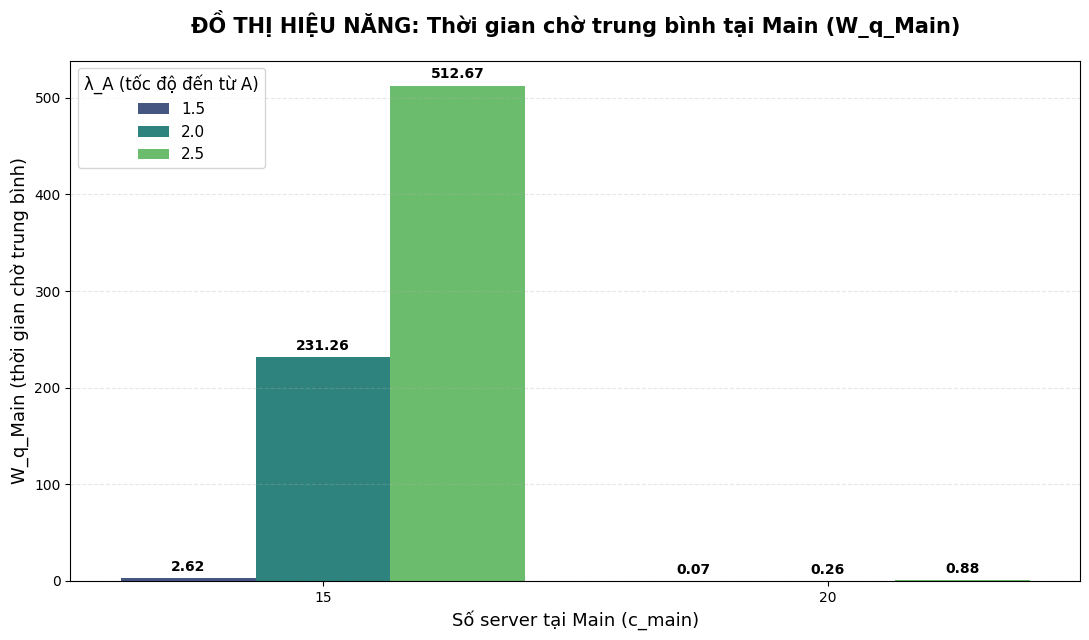

In [ ]:
def customer_journey(env, name, current_location, stations, stats, warmup_end):
    system_arrival_time = env.now
    while current_location != 'Sink':
        station = stations[current_location]
        node_arrival_time = env.now

        if station.capacity < float('inf'):
            if station.num_in_system >= station.capacity:
                if env.now > warmup_end:
                    stats['lost'][station.name] += 1
                return
            station.num_in_system += 1

        # Giới hạn queue Main
        if station.name == 'Main' and len(station.server.queue) > MAX_QUEUE_MAIN:
            if env.now > warmup_end:
                stats['queue_capped'] += 1
            return

        with station.server.request() as req:
            yield req
            wait = env.now - node_arrival_time
            if env.now > warmup_end:
                stats['wait_times'][station.name].append(wait)

            service_time = station.get_service_time()
            yield env.timeout(service_time)

        if station.capacity < float('inf'):
            station.num_in_system -= 1

        rules = ROUTING_RULES[current_location]
        current_location = np.random.choice(list(rules.keys()), p=list(rules.values()))

    if env.now > warmup_end:
        stats['system_time'].append(env.now - system_arrival_time)
        stats['completed'] += 1

def source_generator_experiment(env, name, lambda_rate, entry_point, stations, stats, warmup_end):
    customer_id = 0
    while True:
        iat = np.random.exponential(1.0 / lambda_rate)
        yield env.timeout(iat)
        customer_id += 1
        customer_name = f"{name}-{customer_id}"
        if env.now > warmup_end:
            stats['arrivals'][name] += 1
        env.process(customer_journey(env, customer_name, entry_point, stations, stats, warmup_end))

def run_single_rep(c_main, lambda_a):
    # Ước lượng ρ Main (cải tiến)
    lambda_main_approx = lambda_a * 0.5 + LAMBDA_B * 0.1 + (lambda_a * 0.5 + LAMBDA_B * 0.1) * 0.5  # feedback
    if c_main * MU_MAIN < lambda_main_approx * 0.9:
        return {
            'W_q_Main': 'UNSTABLE', 'System_Time': 'UNSTABLE', 'Loss_Rate': -1
        }

    env = simpy.Environment()
    stats = {
        'arrivals': collections.defaultdict(int),
        'lost': collections.defaultdict(int),
        'completed': 0,
        'wait_times': collections.defaultdict(list),
        'system_time': [],
        'queue_capped': 0
    }
    warmup_end = WARMUP

    stations = {
        'PC-A': Station(env, 'PC-A', SERVERS_PCA, MU_PCA, K_PCA),
        'PC-B': Station(env, 'PC-B', SERVERS_PCB, MU_PCB, K_PCB),
        'Salad': Station(env, 'Salad', SERVERS_SALAD, MU_SALAD),
        'Main': Station(env, 'Main', c_main, MU_MAIN),
        'Dessert': Station(env, 'Dessert', SERVERS_DESSERT, MU_DESSERT),
        'Drink': Station(env, 'Drink', SERVERS_DRINK, MU_DRINK)
    }

    env.process(source_generator_experiment(env, 'Entrance-A', lambda_a, 'PC-A', stations, stats, warmup_end))
    env.process(source_generator_experiment(env, 'Entrance-B', LAMBDA_B, 'PC-B', stations, stats, warmup_end))
    env.run(until=SIM_TIME)

    results = {}
    for name in stats['wait_times']:
        if stats['wait_times'][name]:
            results[f'W_q_{name}'] = np.mean(stats['wait_times'][name])
        else:
            results[f'W_q_{name}'] = 0.0
    results['System_Time'] = np.mean(stats['system_time']) if stats['system_time'] else 0
    total_arrivals = sum(stats['arrivals'].values())
    total_lost = sum(stats['lost'].values())
    results['Loss_Rate'] = total_lost / total_arrivals if total_arrivals > 0 else 0
    results['Throughput'] = stats['completed'] / (SIM_TIME - WARMUP)
    return results

# === CHẠY PHASE 1 ===
def run_phase1():
    configs = [(15, 1.5), (15, 2.0), (15, 2.5), (20, 1.5), (20, 2.0), (20, 2.5)]
    all_results = []

    print("PHASE 1")
    for c_main, lambda_a in configs:
        print(f"c_main={c_main}, λ_A={lambda_a}")
        with Pool(os.cpu_count()) as p:
            rep_results = p.starmap(run_single_rep, [(c_main, lambda_a)] * REPS)
        df = pd.DataFrame(rep_results)
        mean_ci = df.apply(
            lambda x: f"{x.mean():.2f}±{1.96*x.sem():.2f}"
            if isinstance(x.iloc[0], (int, float)) and pd.notna(x.mean())
            else x.iloc[0],
            axis=0
        )
        all_results.append({'c_main': c_main, 'lambda_a': lambda_a, **mean_ci.to_dict()})

    final_df = pd.DataFrame(all_results)
    final_df.to_csv("phase1.csv", index=False)
    print("Đã lưu kết quả: phase1.csv")

    df = pd.read_csv("phase1.csv")

    def extract_mean(x):
        if '±' in str(x):
            return float(x.split('±')[0])
        elif x == 'UNSTABLE':
            return np.nan
        else:
            return float(x)

    df['W_q_Main_mean'] = df['W_q_Main'].apply(extract_mean)
    df_plot = df.dropna(subset=['W_q_Main_mean']).copy()
    df_plot['lambda_a'] = df_plot['lambda_a'].astype(str)

    # Vẽ đồ thị cột
    plt.figure(figsize=(11, 6.5))
    ax = sns.barplot(
        data=df_plot,
        x='c_main',
        y='W_q_Main_mean',
        hue='lambda_a',
        palette='viridis',
        errorbar=None
    )

    plt.title('ĐỒ THỊ HIỆU NĂNG: Thời gian chờ trung bình tại Main (W_q_Main)',
              fontsize=15, fontweight='bold', pad=20)
    plt.xlabel('Số server tại Main (c_main)', fontsize=13)
    plt.ylabel('W_q_Main (thời gian chờ trung bình)', fontsize=13)
    plt.legend(title='λ_A (tốc độ đến từ A)', title_fontsize=12, fontsize=11, loc='upper left')
    plt.grid(axis='y', alpha=0.3, linestyle='--')

    # Hiển thị giá trị trên đầu cột
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=10, fontweight='bold', padding=3)

    plt.tight_layout()
    plt.savefig("do_thi_hieu_nang_Wq_Main.png", dpi=300, bbox_inches='tight')
    # plt.show()
    print("Đã lưu đồ thị: do_thi_hieu_nang_Wq_Main.png")

if __name__ == "__main__":
    run_phase1()

##5.2 Phase 2

PHASE 2
c_main=20, c_salad=4, c_dessert=2
c_main=20, c_salad=5, c_dessert=2
c_main=20, c_salad=6, c_dessert=2
c_main=20, c_salad=3, c_dessert=3
c_main=20, c_salad=3, c_dessert=4
c_main=20, c_salad=3, c_dessert=5
c_main=20, c_salad=4, c_dessert=3
c_main=20, c_salad=4, c_dessert=4
c_main=20, c_salad=4, c_dessert=5
c_main=20, c_salad=5, c_dessert=3
c_main=20, c_salad=5, c_dessert=4
c_main=20, c_salad=5, c_dessert=5
Kết quả: phase2.csv

Tìm thấy 1 cấu hình ĐẠT yêu cầu:
    c_main  c_salad  c_dessert  System_Time_mean  W_q_Main_mean  \
11      20        5          5            12.565          1.559   

    W_q_Salad_mean  W_q_Dessert_mean  Loss_Rate_mean  
11           0.225             0.284           0.003  
Đã lưu biểu đồ: phase2_valid_Wq_comparison.png


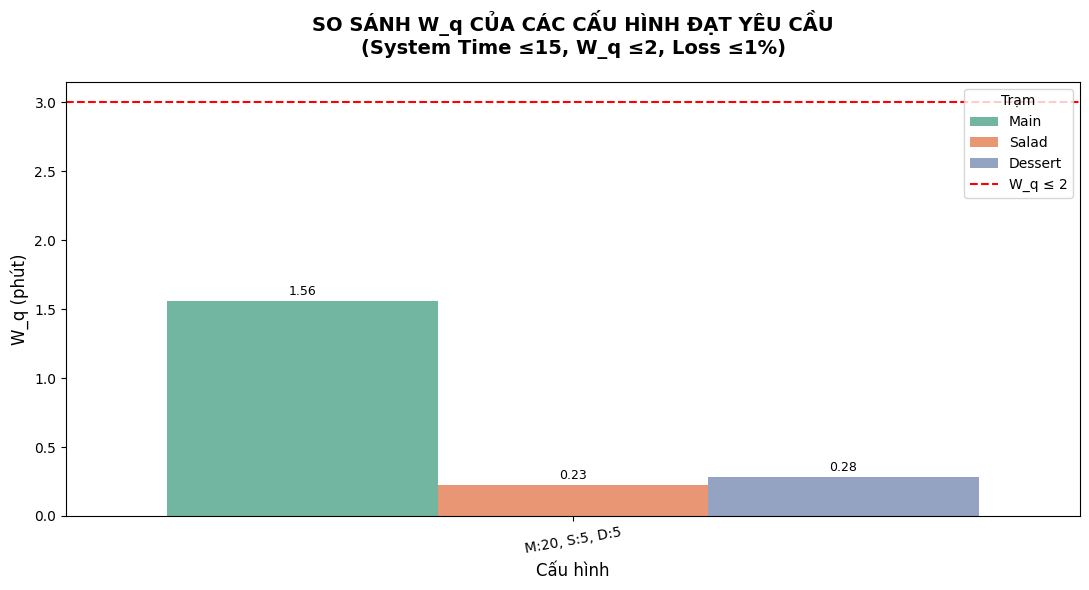

In [ ]:
# === HÀM CHẠY 1 REPLICATION ===
def run_single_rep(c_main, c_salad, c_dessert):
    env = simpy.Environment()
    stats = {
        'wait_times': {k: [] for k in ['PC-A','PC-B','Salad','Main','Dessert','Drink']},
        'system_time': [],
        'completed': 0,
        'arrivals': collections.defaultdict(int),
        'lost': collections.defaultdict(int),
        'queue_capped': 0
    }
    warmup_end = WARMUP

    stations = {
        'PC-A': Station(env, 'PC-A', SERVERS_PCA, MU_PCA, K_PCA),
        'PC-B': Station(env, 'PC-B', SERVERS_PCB, MU_PCB, K_PCA),
        'Salad': Station(env, 'Salad', c_salad, MU_SALAD),
        'Main': Station(env, 'Main', c_main, MU_MAIN),
        'Dessert': Station(env, 'Dessert', c_dessert, MU_DESSERT),
        'Drink': Station(env, 'Drink', 4, MU_DRINK)
    }

    env.process(source_generator(env, 'Entrance-A', LAMBDA_A, 'PC-A', stations, stats, warmup_end))
    env.process(source_generator(env, 'Entrance-B', LAMBDA_B, 'PC-B', stations, stats, warmup_end))
    env.run(until=SIM_TIME)

    results = {}
    for name in stats['wait_times']:
        if stats['wait_times'][name]:
            results[f'W_q_{name}'] = np.mean(stats['wait_times'][name])
        else:
            results[f'W_q_{name}'] = 0.0
    results['System_Time'] = np.mean(stats['system_time']) if stats['system_time'] else 0
    total_arrivals = sum(stats['arrivals'].values())
    total_lost = sum(stats['lost'].values())
    results['Loss_Rate'] = (total_lost / total_arrivals) if total_arrivals > 0 else 0
    results['Throughput'] = stats['completed'] / (SIM_TIME - WARMUP)
    return results

def run_phase2():
    configs = [
        (20, 4, 2), (20, 5, 2), (20, 6, 2),
        (20, 3, 3), (20, 3, 4), (20, 3, 5),
        (20, 4, 3), (20, 4, 4), (20, 4, 5),
        (20, 5, 3), (20, 5, 4), (20, 5, 5)

    ]
    all_results = []

    print("PHASE 2")
    for c_main, c_salad, c_dessert in configs:
        print(f"c_main={c_main}, c_salad={c_salad}, c_dessert={c_dessert}")
        with Pool(min(8, os.cpu_count())) as p:
            rep_results = p.starmap(run_single_rep, [(c_main, c_salad, c_dessert)] * REPS)
        df = pd.DataFrame(rep_results)
        mean_ci = df.apply(
            lambda x: f"{x.mean():.3f}±{1.96*x.sem():.3f}"
            if isinstance(x.iloc[0], (int, float)) and pd.notna(x.mean())
            else x.iloc[0],
            axis=0
        )
        all_results.append({
            'c_main': c_main, 'c_salad': c_salad, 'c_dessert': c_dessert,
            **mean_ci.to_dict()
        })

    final_df = pd.DataFrame(all_results)
    final_df.to_csv("phase2.csv", index=False)
    print("Kết quả: phase2.csv")

    df = pd.read_csv("phase2.csv")

    # === LỌC CẤU HÌNH ĐẠT YÊU CẦU ===
    def extract_mean(val):
        if isinstance(val, str) and '±' in val:
            return float(val.split('±')[0])
        return float(val) if pd.notna(val) else np.nan

    num_cols = [col for col in final_df.columns if col not in ['c_main', 'c_salad', 'c_dessert']]
    for col in num_cols:
        final_df[col + '_mean'] = final_df[col].apply(extract_mean)

    Wq_cols = [f'W_q_{s}_mean' for s in ['PC-A','PC-B','Salad','Main','Dessert','Drink']]
    valid_configs = final_df[
        (final_df['System_Time_mean'] <= 15) &
        (final_df[Wq_cols].max(axis=1) <= 2) &
        (final_df['Loss_Rate_mean'] <= 0.01)
    ].copy()

    if valid_configs.empty:
        print("\nKhông có cấu hình nào đạt yêu cầu!")
        return

    print(f"\nTìm thấy {len(valid_configs)} cấu hình ĐẠT yêu cầu:")
    print(valid_configs[['c_main', 'c_salad', 'c_dessert',
                         'System_Time_mean', 'W_q_Main_mean', 'W_q_Salad_mean',
                         'W_q_Dessert_mean', 'Loss_Rate_mean']].round(3))

    # === VẼ BIỂU ĐỒ ===
    valid_configs['Config'] = valid_configs.apply(
        lambda r: f"M:{int(r.c_main)}, S:{int(r.c_salad)}, D:{int(r.c_dessert)}", axis=1
    )

    plot_data = []
    for _, row in valid_configs.iterrows():
        for station, wq_col in [('Main', 'W_q_Main_mean'), ('Salad', 'W_q_Salad_mean'), ('Dessert', 'W_q_Dessert_mean')]:
            plot_data.append({
                'Config': row['Config'],
                'Station': station,
                'W_q': row[wq_col]
            })
    plot_df = pd.DataFrame(plot_data)

    plt.figure(figsize=(11, 6))
    ax = sns.barplot(data=plot_df, x='Config', y='W_q', hue='Station', palette='Set2', errorbar=None)
    plt.title('SO SÁNH W_q CỦA CÁC CẤU HÌNH ĐẠT YÊU CẦU\n(System Time ≤15, W_q ≤2, Loss ≤1%)',
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Cấu hình', fontsize=12)
    plt.ylabel('W_q (phút)', fontsize=12)
    plt.axhline(3, color='red', linestyle='--', linewidth=1.5, label='W_q ≤ 2')
    plt.legend(title='Trạm', loc='upper right')
    for c in ax.containers:
        ax.bar_label(c, fmt='%.2f', fontsize=9, padding=2)
    plt.xticks(rotation=10)
    plt.tight_layout()

    img_file = "phase2_valid_Wq_comparison.png"
    plt.savefig(img_file, dpi=300, bbox_inches='tight')
    print(f"Đã lưu biểu đồ: phase2_valid_Wq_comparison.png")

if __name__ == "__main__":
    run_phase2()

# 6. Conclusions
After completing the Discrete-Event Simulation for D'Maris buffet restaurant using the Performance Evaluation (PE) methodology, the findings are summarized as follows:

## Key strengths:
- Comprehensive application of standard PE methodology
- Accurate bottleneck identification and resolution
  - Identified the Main Course station as the bottleneck (ρ_Main > 1 when c_Main ≤ 15)
  - Proposed increasing from 5 → 20 stations, reducing W_q from >200 minutes to < 5 minutes
- Reliable workload modeling
  - 3 Workload scenarios: Baseline, Peak, Low
  - SIM_TIME = 10,000 minutes (~7 days), Warm-up = 2,000 minutes, 10 replications → narrow 95% CI

## Limitations:
- No real-time peak/off-peak hourly modeling within a day
  - Currently uses 3 separate scenarios without varying λ by time slots (e.g., increased λ during 18:00–20:00)
  - May not accurately reflect actual daily operational fluctuations
- No customer abandonment behavior modeling (balking/reneging)
  - Customers only rejected at payment counters (capacity=10), no modeling of customers leaving due to excessive Main station queues. May underestimate actual Loss Rate
- No operational cost integration
  - Proposed adding 15 Main stations (from 5 to 20) without calculating staff, electricity, space costs
  - No cost-benefit optimized solution provided

## Future development proposals
- Model time-varying λ throughout the day (non-stationary Poisson process)
- Add balking/reneging and cost modeling and find profit-optimal c_Main
- Compare with actual operational data from D'Maris restaurant.

